In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
l=le()
data=pd.read_csv('Housing.csv')
data['mainroad']=l.fit_transform(data['mainroad'])
data['guestroom']=l.fit_transform(data['guestroom'])
data['basement']=l.fit_transform(data['basement'])
data['hotwaterheating']=l.fit_transform(data['hotwaterheating'])
data['airconditioning']=l.fit_transform(data['airconditioning'])
data['prefarea']=l.fit_transform(data['prefarea'])
data['furnishingstatus']=l.fit_transform(data['furnishingstatus'])
data.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


In [3]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
x=data.iloc[:,1:5]
y=data.iloc[:,:1]
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score,explained_variance_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=5)
lin=Lasso()
lin.fit(xtrain,ytrain)
ypred=lin.predict(xtest)
print("Lasso score for Train model",lin.score(xtrain,ytrain))
print("\nLasso score for Test model",lin.score(xtest,ytest))
print("\nMean Squared error :",mean_squared_error(ytest,ypred))
print("\nMean Absolut error :",mean_absolute_error(ytest,ypred))
print("\nRMSE :",np.sqrt(mean_squared_error(ytest,ypred)))
print("\nR Square :",r2_score(ytest,ypred))

Lasso score for Train model 0.5420981142905361

Lasso score for Test model 0.4189037697525204

Mean Squared error : 1307615890747.8474

Mean Absolut error : 868756.2021349922

RMSE : 1143510.3369658918

R Square : 0.4189037697525204


In [8]:
from sklearn.linear_model import Ridge
lin=Ridge()
lin.fit(xtrain,ytrain)
ypred=lin.predict(xtest)
print("Ridge score for Train model",lin.score(xtrain,ytrain))
print("\nRidge score for Test model",lin.score(xtest,ytest))
print("\nMean Squared error :",mean_squared_error(ytest,ypred))
print("\nMean Absolut error :",mean_absolute_error(ytest,ypred))
print("\nRMSE :",np.sqrt(mean_squared_error(ytest,ypred)))
print("\nR Square :",r2_score(ytest,ypred))

Ridge score for Train model 0.5420887355621236

Ridge score for Test model 0.4193413629253442

Mean Squared error : 1306631193624.2341

Mean Absolut error : 868608.2436502523

RMSE : 1143079.6969696532

R Square : 0.4193413629253442


In [9]:
lin=Lasso(alpha=2)
lin.fit(xtrain,ytrain)
ypred=lin.predict(xtest)
print("Lasso score for Train model",lin.score(xtrain,ytrain))
print("\nLasso score for Test model",lin.score(xtest,ytest))
print("\nMean Squared error :",mean_squared_error(ytest,ypred))
print("\nMean Absolut error :",mean_absolute_error(ytest,ypred))
print("\nRMSE :",np.sqrt(mean_squared_error(ytest,ypred)))
print("\nR Square :",r2_score(ytest,ypred))

Lasso score for Train model 0.5420981142869

Lasso score for Test model 0.4189037143593325

Mean Squared error : 1307616015396.7593

Mean Absolut error : 868756.2356263506

RMSE : 1143510.3914686388

R Square : 0.4189037143593325


In [10]:
from sklearn.linear_model import Ridge
lin=Ridge(alpha=2)
lin.fit(xtrain,ytrain)
ypred=lin.predict(xtest)
print("Ridge score for Train model",lin.score(xtrain,ytrain))
print("\nRidge score for Test model",lin.score(xtest,ytest))
print("\nMean Squared error :",mean_squared_error(ytest,ypred))
print("\nMean Absolut error :",mean_absolute_error(ytest,ypred))
print("\nRMSE :",np.sqrt(mean_squared_error(ytest,ypred)))
print("\nR Square :",r2_score(ytest,ypred))

Ridge score for Train model 0.5420613740943051

Ridge score for Test model 0.4197398467553938

Mean Squared error : 1305734502575.0479

Mean Absolut error : 868467.2365879528

RMSE : 1142687.4037001755

R Square : 0.4197398467553938


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

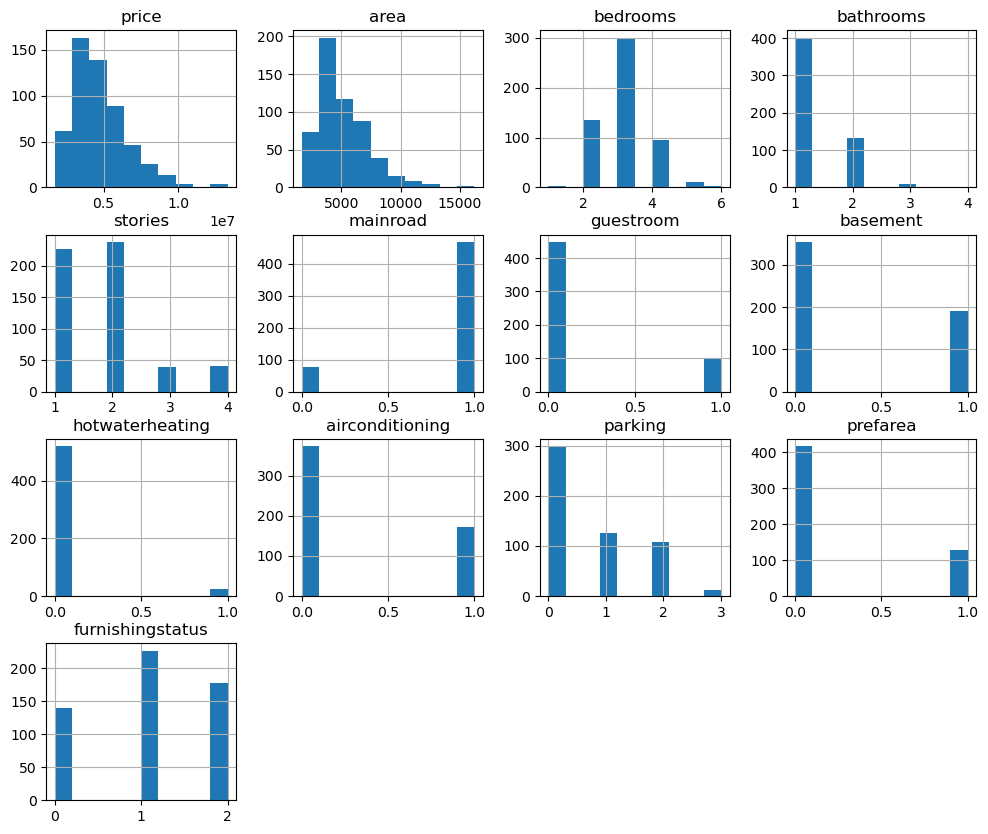

In [11]:
data.hist(figsize=(12,10))

# Project 2

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
l=le()
data=pd.read_csv("Employee.csv")
data['Education'] = l.fit_transform(data['Education'])
data['City'] = l.fit_transform(data['City'])
data['Gender'] = l.fit_transform(data['Gender'])
data['EverBenched'] = l.fit_transform(data['EverBenched'])
data.head(4)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1


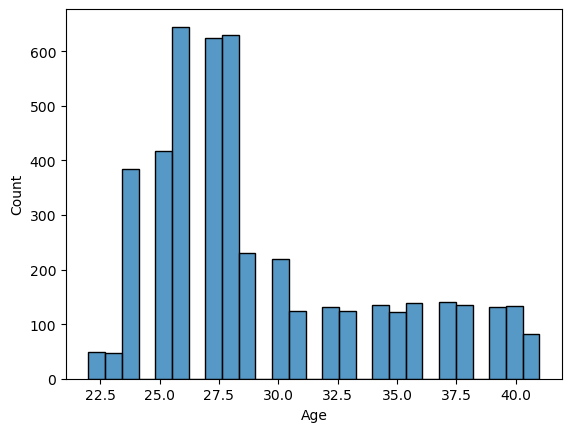

In [13]:
# Example: Plot histograms for numeric variables
sns.histplot(data['Age'])
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
X = data[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']]
y = data['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nMean Squared error :",mean_squared_error(y_test,y_pred))
print("\nMean Absolut error :",mean_absolute_error(y_test,y_pred))
print("\nRMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("\nR Square :",r2_score(y_test,y_pred))


Mean Squared error : 0.1919072081745522

Mean Absolut error : 0.391361152981978

RMSE : 0.43807214950799167

R Square : 0.1505148681651446


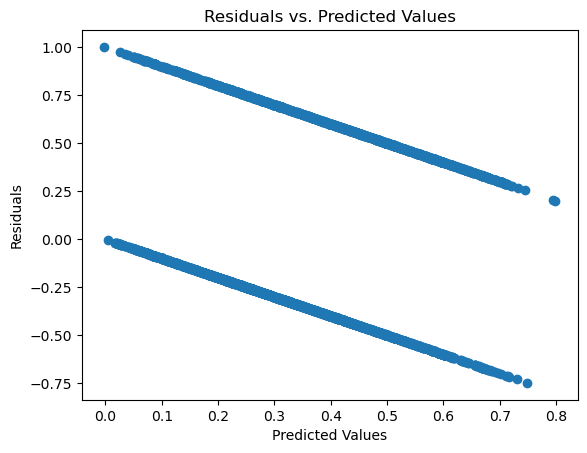

Breusch-Pagan test p-value: 1.75906928500251e-38
VIF:
                     Variable           VIF
0                      const  1.204536e+06
1                  Education  1.055572e+00
2                JoiningYear  1.032177e+00
3                       City  1.126873e+00
4                PaymentTier  1.159697e+00
5                        Age  1.022813e+00
6                     Gender  1.071876e+00
7                EverBenched  1.005477e+00
8  ExperienceInCurrentDomain  1.022202e+00


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Diagnosing Heteroscedasticity
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
residuals = results.resid

# a. Generate residual plots
plt.scatter(results.predict(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# b. Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, sm.add_constant(X_train))
print("Breusch-Pagan test p-value:", bp_test[1])

# 2. Remedying Heteroscedasticity
# If heteroscedasticity is detected, you can consider transforming variables or using weighted least squares (WLS) regression.
# Example: Using log transformation for the target variable
y_train_log = np.log(y_train)
model = sm.OLS(y_train_log, sm.add_constant(X_train))
results = model.fit()
y_pred_log = results.predict()
y_pred = np.exp(y_pred_log)

# 3. Detecting Multicollinearity
X_with_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("VIF:\n", vif)
